In [28]:
import numpy as np
import matplotlib
import sys
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import scipy
from scipy import ndimage

## ipython notebook magic word to plot in the notebook
%matplotlib inline

## ipython notebook magic word to change the base directory
#%cd /Your/location/to/the/data

In [29]:
ell, DlTT = np.loadtxt("CAMB_fiducial_cosmo_scalCls.dat", usecols=(0, 1), unpack=True)

N = 2**11  # this is the number of pixels in a linear dimension
            ## since we are using lots of FFTs this should be a factor of 2^N
pix_size  = 0.5 # size of a pixel in arcminutes

## variables to set up the map plots
c_min = -400  # minimum for color bar
c_max = 400   # maximum for color bar
X_width = N*pix_size/60.  # horizontal map width in degrees
Y_width = N*pix_size/60.  # vertical map width in degrees

"makes a realization of a simulated CMB sky map given an input DlTT as a function of ell," 
"the pixel size (pix_size) required and the number N of pixels in the linear dimension."

# convert Dl to Cl
ClTT = DlTT * 2 * np.pi / (ell*(ell+1.))
ClTT[0] = 0. # set the monopole and the dipole of the Cl spectrum to zero
ClTT[1] = 0.

# make a 2D real space coordinate system
onesvec = np.ones(N)
inds  = (np.arange(N)+.5 - N/2.) /(N-1.) # create an array of size N between -0.5 and +0.5
# compute the outer product matrix: X[i, j] = onesvec[i] * inds[j] for i,j 
# in range(N), which is just N rows copies of inds - for the x dimension
X = np.outer(onesvec,inds) 
# compute the transpose for the y dimension
Y = np.transpose(X)
# radial component R
R = np.sqrt(X**2. + Y**2.)

# now make a 2D CMB power spectrum
pix_to_rad = (pix_size/60. * np.pi/180.) # going from pix_size in arcmins to degrees and then degrees to radians
ell_scale_factor = 2. * np.pi /pix_to_rad  # now relating the angular size in radians to multipoles
ell2d = R * ell_scale_factor # making a fourier space analogue to the real space R vector
ClTT_expanded = np.zeros(int(ell2d.max())+1) 
# making an expanded Cl spectrum (of zeros) that goes all the way to the size of the 2D ell vector
ClTT_expanded[0:(ClTT.size)] = ClTT # fill in the Cls until the max of the ClTT vector

# the 2D Cl spectrum is defined on the multiple vector set by the pixel scale
CLTT2d = ClTT_expanded[ell2d.astype(int)] 

# now make a realization of the CMB with the given power spectrum in real space
random_array_for_T = np.random.normal(0,1,(N,N))
FT_random_array_for_T = np.fft.fft2(random_array_for_T)   # take FFT since we are in Fourier space 

FT_2d = np.sqrt(CLTT2d) * FT_random_array_for_T # we take the sqrt since the power spectrum is T^2

## make a plot of the 2D cmb simulated map in Fourier space, note the x and y axis labels need to be fixed
#Plot_CMB_Map(np.real(np.conj(FT_2d)*FT_2d*ell2d * (ell2d+1)/2/np.pi),0,np.max(np.conj(FT_2d)*FT_2d*ell2d * (ell2d+1)/2/np.pi),ell2d.max(),ell2d.max())  ###

# move back from ell space to real space
CMB_T = np.fft.ifft2(np.fft.fftshift(FT_2d)) 
# move back to pixel space for the map
CMB_T = CMB_T/(pix_size /60.* np.pi/180.)
# we only want to plot the real component
CMB_T = np.real(CMB_T)

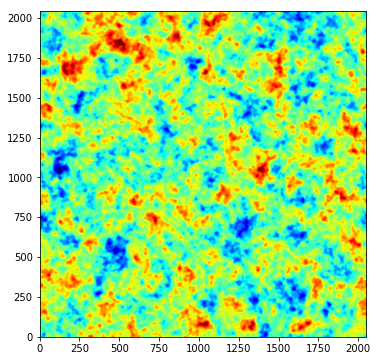

In [30]:
plt.figure(figsize=(6,6))
plt.imshow(CMB_T,vmin=-350.,vmax=350, interpolation='bilinear', origin='lower',cmap="jet")